# TWITTER SENTIMENT ANALYSIS

Sentiment Analysis is the automated process of analyzing text data and sorting it into sentiments positive, negative or neutral. With more than 321 million active users, sending a daily average of 500 million Tweets, Twitter allows businesses to reach a broad audience and connect with customers without intermediaries.

### 1. EXTRACTING TWEETS

An easy-to-use Python library called Tweepy is used for accessing the Twitter API.

In [1]:
#importing the tweety library
import tweepy
import time

In [2]:
#providing access details-- twitter credentials
consumer_key = 'a6OANIAaWDrYYnKSh8EhjKqKa'
consumer_secret = 'KrLHDb4vspTfavBBgBdtR9sVQu9UDUJcZccu9z0uWPxtxgBRKg'
access_token = '1144280360290643968-x1e0Dogngl6jLsVnFeRrusG9pVCKy7'
access_token_secret = 'w4F24CJeJP3eAwOvmqXCY1xlFhEN8OvYy1m7OhuofgHZg'

In [3]:
#establish a connection-- passing twitter credentials to tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [4]:
get_tweets1=api.search(q=['Budget2019'],count=100,lang="en",tweet_mode='extended',since='2019-07-05')
#q is for query . here write the keywords/hashtag to word.

In [5]:
get_tweets2=api.search(q=['Union Budget','2019'],count=100,lang="en",tweet_mode='extended',result_type=True,since='2019-07-05')
get_tweets3=api.search(q=['BudgetForNewIndia'],count=100,lang="en",tweet_mode='extended',result_type=True,since='2019-07-05')
get_tweets4=api.search(q=['BudgetWithMint'],count=100,lang="en",tweet_mode='extended',result_type=True,since='2019-07-05')
get_tweets5=api.search(q=['UnionBudget'],count=100,lang="en",tweet_mode='extended',result_type=True,since='2019-07-05')

### 2.  DATA COLLECTION

The data collected from twitter is collected in a dataframe 

In [6]:
import numpy as np

In [7]:
def populate_tweet_df(tweets):
    df=pd.DataFrame() ## creating an empty dataframe
    df['id']=list(map(lambda tweet:tweet.id,tweets))
    df['text']=list(map(lambda tweet:tweet.full_text,tweets))
    df['date']=list(map(lambda tweet:tweet.created_at,tweets))
    df['likes']=list(map(lambda tweet:tweet.favorite_count,tweets))
    df['retweet_count']=list(map(lambda tweet:tweet.retweet_count,tweets))
    df['place']=list(map(lambda tweet:tweet.user.location,tweets))
    df['verified_user']=list(map(lambda tweet:tweet.user.verified,tweets))
    df['followers_count']=list(map(lambda tweet:tweet.user.followers_count,tweets))
    df['friends_count']=list(map(lambda tweet:tweet.user.friends_count,tweets))
    df['screen_name']=list(map(lambda tweet:tweet.user.screen_name,tweets))
    
    return df

In [8]:
import pandas as pd
data1=populate_tweet_df(get_tweets1)
data2=populate_tweet_df(get_tweets2)
data3=populate_tweet_df(get_tweets3)
data4=populate_tweet_df(get_tweets4)
data5=populate_tweet_df(get_tweets5)

In [9]:
set_of_data=[data1,data2,data3,data4,data5]
data=pd.concat(set_of_data)

In [10]:
data.head()

,id,text,date,likes,retweet_count,place,verified_user,followers_count,friends_count,screen_name
0,1150638623471099904,Growth is inevitable: @devangshudatta on the f...,2019-07-15 05:30:00,0,0,New Delhi,True,59984,360,Openthemag
1,1150638436262350849,RT @SanjaySDutt: #Budget2019 is symptomatic of...,2019-07-15 05:29:15,0,64,,False,0,6,Adhittan4
2,1150638420722536449,RT @INCIndia: Now that the govt. has finally a...,2019-07-15 05:29:11,0,604,,False,0,6,Adhittan4
3,1150637699587379200,"RT @newslaundry: It's #NLHafta time, folks!\n\...",2019-07-15 05:26:20,0,4,,True,61551,440,AbhinandanSekhr
4,1150637326642454529,RT @SteelMinIndia: Steel will be used for the ...,2019-07-15 05:24:51,0,12,,False,228,180,ClifaA


In [11]:
data.shape

(470, 10)

In [12]:
pd.options.display.max_colwidth

50

In [13]:
pd.options.display.max_colwidth=int(data['text'].str.len().max())+1000

In [14]:
data.head()

,id,text,date,likes,retweet_count,place,verified_user,followers_count,friends_count,screen_name
0,1150638623471099904,"Growth is inevitable: @devangshudatta on the future according to a professional pessimist, #Budget2019, #TheEconomyIssue2019, https://t.co/mdsBQiyoIE https://t.co/BCuYXameDC",2019-07-15 05:30:00,0,0,New Delhi,True,59984,360,Openthemag
1,1150638436262350849,"RT @SanjaySDutt: #Budget2019 is symptomatic of BJP track-record :\nTall promises : Zero delivery!\nVision-less, Direction-less, Provision-les…",2019-07-15 05:29:15,0,64,,False,0,6,Adhittan4
2,1150638420722536449,"RT @INCIndia: Now that the govt. has finally accepted that unemployment is at a 45 year high, #Budget2019 must put forth a detailed plan fo…",2019-07-15 05:29:11,0,604,,False,0,6,Adhittan4
3,1150637699587379200,"RT @newslaundry: It's #NLHafta time, folks!\n\nIn this episode, @AbhinandanSekhr, @madhutrehan, @anandvardhan26 and @ramankirpal are joined b…",2019-07-15 05:26:20,0,4,,True,61551,440,AbhinandanSekhr
4,1150637326642454529,RT @SteelMinIndia: Steel will be used for the development of the world class institutes. #Budget2019 https://t.co/Oyof8W3moI,2019-07-15 05:24:51,0,12,,False,228,180,ClifaA


In [15]:
data.to_excel('budget2.3.xlsx',sheet_name='Sheet1')

### 3. CHECKING FOR NULL VALUES

In [16]:
data.isnull().sum()

id                 0
text               0
date               0
likes              0
retweet_count      0
place              0
verified_user      0
followers_count    0
friends_count      0
screen_name        0
dtype: int64

In [17]:
data[data.text.isnull()==True]

,id,text,date,likes,retweet_count,place,verified_user,followers_count,friends_count,screen_name


In [18]:
data.dropna(inplace=True)

In [19]:
data.shape

(470, 10)

In [20]:
df=data[['id', 'text', 'date', 'likes', 'retweet_count']]

In [21]:
df.shape

(470, 5)

In [22]:
blanks=[]
for i,id,text,date,likes,retweet in df.itertuples(): ##iterating through all the columns.
    if type(text)==str:
        if text.isspace():
            blanks.append(i)   

In [23]:
blanks

[]

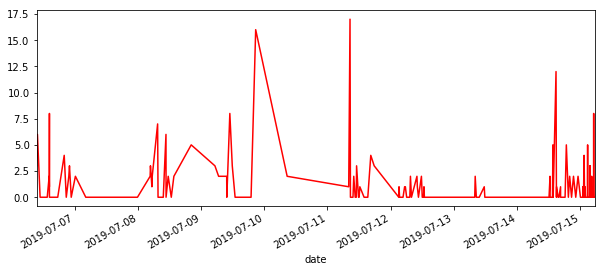

In [67]:
#time series
import matplotlib.pyplot as plt
time_likes=pd.Series(data=data['likes'].values,index=data['date'])
time_likes.plot(figsize=(10,4),color='r')
plt.show()

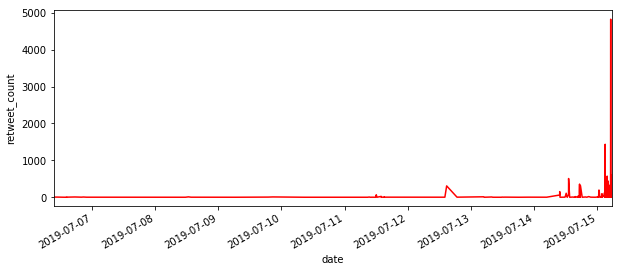

In [68]:
plt.ylabel('retweet_count')
time_retweets=pd.Series(data=data['retweet_count'].values,index=data['date'])
time_retweets.plot(figsize=(10,4),color='r')
plt.show()

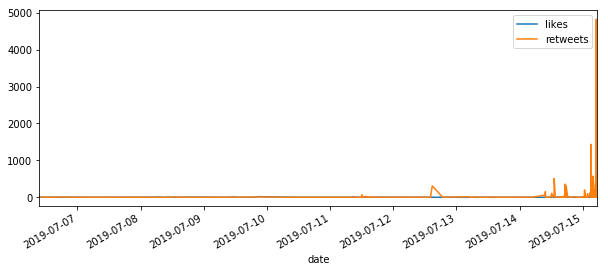

In [69]:
time_likes=pd.Series(data=data['likes'].values,index=data['date'])
time_likes.plot(figsize=(10,4),label='likes',legend=True)
time_retweets=pd.Series(data=data['retweet_count'].values,index=data['date'])
time_retweets.plot(figsize=(10,4),label='retweets',legend=True)
plt.show()

In [70]:
data.drop_duplicates('text',inplace=True)

In [71]:
data.shape

(295, 14)

### 4. DATA CLEANING

In [72]:
import re #random expressions
def text_process2(text):
    #removing @user and urls from tweet text
    text_new=''.join(re.sub(r"(?:\@|https?\://)\S+", "",text))
    #removing the manual tweet info from a tweet ie, get rid of "RT@sample_user"
    text_new1=''.join(re.sub("RT",'',text_new))
    return text_new1

In [73]:
data['text']=data['text'].apply(text_process2)

In [74]:
data.head()

,id,text,date,likes,retweet_count,place,verified_user,followers_count,friends_count,screen_name,len_of_text,polarity,subjectivity,sentiment
0,1150638623471099904,Growth inevitable future accord professional pessimist Budget2019 TheEconomyIssue2019,2019-07-15 05:30:00,0,0,New Delhi,True,59984,360,Openthemag,112,0.033333,0.408333,positive
1,1150638436262350849,Budget2019 symptomatic BJP track-record Tall promise Zero delivery Vision-less Direction-less Provision-les…,2019-07-15 05:29:15,0,64,,False,0,6,Adhittan4,125,0.000000,0.000000,neutral
2,1150638420722536449,govt finally accepted unemployment 45 year high Budget2019 must put forth detailed plan fo…,2019-07-15 05:29:11,0,604,,False,0,6,Adhittan4,128,0.186667,0.763333,positive
3,1150637699587379200,'s NLHafta time folk episode join b…,2019-07-15 05:26:20,0,4,,True,61551,440,AbhinandanSekhr,68,0.000000,0.000000,neutral
4,1150637326642454529,Steel use development world class institute Budget2019,2019-07-15 05:24:51,0,12,,False,228,180,ClifaA,84,0.000000,0.000000,neutral


In [75]:
data['len_of_text']=data['text'].apply(len)

### 5. DATA PROCESSING

The data comprises of unstructured tweets which should be preprocessed to make an NLP model.In this project, I tried out the following techniques of preprocessing the raw data. But the preprocessing techniques is not limited.
* Word Tokenization
* Removal of punctuations.
* Removal of commonly used words (stopwords).
* Removal of whitespaces
* Word Lemmatization

In [76]:
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
def text_process(text):
    
    #tokenizing words
    words=nltk.word_tokenize(text)
    
    #removing punctuation
    punc_removed=[word for word in words if word.lower() not in string.punctuation] 
    punc_removed=' '.join(punc_removed)
    
    #removing stopwords
    stopwords_removed=[word for word in punc_removed.split() if word.lower() not in stopwords.words('english')] 
    return ' '.join(stopwords_removed)

In [77]:
data['text']=data['text'].apply(text_process)

In [78]:
data.text.describe()

count                                                                                                          295
unique                                                                                                         295
top       BudgetWithMint content Sitharaman ’ budget speech several similarity predecessor Arun Jaitley Budget2019
freq                                                                                                             1
Name: text, dtype: object

In [79]:
data.drop_duplicates('text',inplace=True)

In [80]:
data.shape

(295, 14)

In [81]:
def remove_whitespace(text):
    new_text2=' '.join(text.split())
    return new_text2

In [82]:
data['text']=data['text'].apply(remove_whitespace)

In [83]:
from nltk.stem import WordNetLemmatizer
wnl=WordNetLemmatizer()

In [84]:
def words_lemmatizer(text,encoding="utf8"):
    words=nltk.word_tokenize(text)
    lemma_words=[]
    for word in words:
        enl=WordNetLemmatizer()
        pos=find_pos(word)
        lemma_words.append(wnl.lemmatize(word,pos))
    return ' '.join(lemma_words)    

In [86]:
data['text']=data['text'].apply(words_lemmatizer)

In [87]:
data.to_excel('Budget2.4.xlsx',sheet_name='sheet1')

### 6. SENTIMENT ANALYSIS USING TEXTBLOB 

TextBlob is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

In [88]:
from textblob import TextBlob

In [89]:
pol=lambda x: TextBlob(x).sentiment.polarity
sub=lambda x: TextBlob(x).sentiment.subjectivity

In [90]:
data['polarity']=data['text'].apply(pol)

In [91]:
data['subjectivity']=data['text'].apply(sub)

In [92]:
data.head(10)

,id,text,date,likes,retweet_count,place,verified_user,followers_count,friends_count,screen_name,len_of_text,polarity,subjectivity,sentiment
0,1150638623471099904,Growth inevitable future accord professional pessimist Budget2019 TheEconomyIssue2019,2019-07-15 05:30:00,0,0,New Delhi,True,59984,360,Openthemag,85,0.033333,0.408333,positive
1,1150638436262350849,Budget2019 symptomatic BJP track-record Tall promise Zero delivery Vision-less Direction-less Provision-les…,2019-07-15 05:29:15,0,64,,False,0,6,Adhittan4,108,0.000000,0.000000,neutral
2,1150638420722536449,govt finally accepted unemployment 45 year high Budget2019 must put forth detailed plan fo…,2019-07-15 05:29:11,0,604,,False,0,6,Adhittan4,91,0.186667,0.763333,positive
3,1150637699587379200,'s NLHafta time folk episode join b…,2019-07-15 05:26:20,0,4,,True,61551,440,AbhinandanSekhr,36,0.000000,0.000000,neutral
4,1150637326642454529,Steel use development world class institute Budget2019,2019-07-15 05:24:51,0,12,,False,228,180,ClifaA,54,0.000000,0.000000,neutral
5,1150636826316509184,Steel use development Udaan scheme enhance infrastructure airport Budget2…,2019-07-15 05:22:51,0,5,,False,228,180,ClifaA,74,0.000000,0.000000,neutral
6,1150636175197122560,cash culture increase Budget2019 Cafes Shops Restaurants blatantly discourage credit cards.…,2019-07-15 05:20:16,0,16,"Karachi, Pakistan",False,464,190,faisalan,92,-0.500000,0.500000,negative
7,1150635048925745152,India emerge strong contender change mindset explore earth produce mi…,2019-07-15 05:15:48,0,46,,False,228,180,ClifaA,70,0.433333,0.733333,positive
8,1150634855056715781,2019 2020 budget boost Indian Start-ups favourable startup insight Research Analyst,2019-07-15 05:15:01,0,2,"Surat, India",False,581,14,Ideastycoon,83,0.000000,0.000000,neutral
9,1150634355393302528,Easing FDI AVGC sector boost investment propel robust entrepreneurial ecosystem nurture RnD amp creatin…,2019-07-15 05:13:02,0,168,,False,7,14,VidyaUB2904,104,0.000000,0.000000,neutral


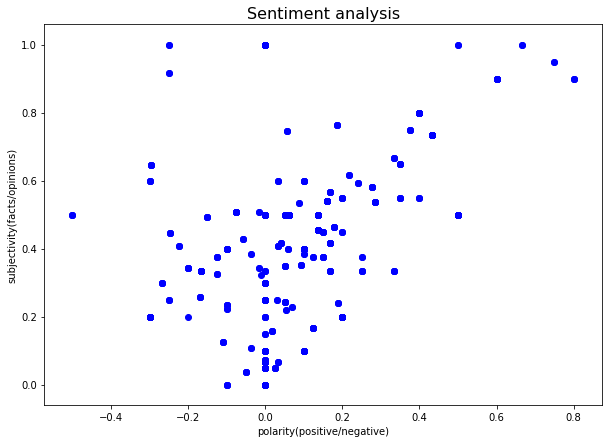

In [93]:
#plotting the results--polarity vs subjectivity
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
for index,id in enumerate(data.index):
    x=data.polarity.loc[id]
    y=data.subjectivity.loc[id]
    plt.scatter(x,y,color='blue')
    
plt.xlabel('polarity(positive/negative)')  ##from -1 yo 1
plt.ylabel('subjectivity(facts/opinions)')  ##drom 0 yo 1
plt.title('Sentiment analysis',fontsize=16)
plt.show()

In [94]:
data.shape

(295, 14)

In [95]:
data.head()

,id,text,date,likes,retweet_count,place,verified_user,followers_count,friends_count,screen_name,len_of_text,polarity,subjectivity,sentiment
0,1150638623471099904,Growth inevitable future accord professional pessimist Budget2019 TheEconomyIssue2019,2019-07-15 05:30:00,0,0,New Delhi,True,59984,360,Openthemag,85,0.033333,0.408333,positive
1,1150638436262350849,Budget2019 symptomatic BJP track-record Tall promise Zero delivery Vision-less Direction-less Provision-les…,2019-07-15 05:29:15,0,64,,False,0,6,Adhittan4,108,0.000000,0.000000,neutral
2,1150638420722536449,govt finally accepted unemployment 45 year high Budget2019 must put forth detailed plan fo…,2019-07-15 05:29:11,0,604,,False,0,6,Adhittan4,91,0.186667,0.763333,positive
3,1150637699587379200,'s NLHafta time folk episode join b…,2019-07-15 05:26:20,0,4,,True,61551,440,AbhinandanSekhr,36,0.000000,0.000000,neutral
4,1150637326642454529,Steel use development world class institute Budget2019,2019-07-15 05:24:51,0,12,,False,228,180,ClifaA,54,0.000000,0.000000,neutral


In [96]:
def textblob_sentiment(x):
    if x>0:
        return 'positive'
    elif x<0:
        return 'negative'
    else:
        return 'neutral'

In [97]:
data['sentiment']=data['polarity'].apply(textblob_sentiment)

### DATA EXPLORATION OF TEXT

In [98]:
def percentage(part,whole):
    return 100*float(part)/float(whole)

In [99]:
len(data)

295

In [100]:
data.sentiment.value_counts()

neutral     167
positive     92
negative     36
Name: sentiment, dtype: int64

In [101]:
pos=percentage(114,268)

In [102]:
neg=percentage(22,268)

In [103]:
neu=percentage(132,268)

In [104]:
##coverting to 2 decimal place
pos=format(pos,'.2f')
neg=format(neg,'.2f')
neu=format(neu,'.2f')

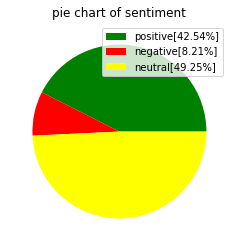

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [105]:
labels=['positive['+str(pos)+'%]','negative['+str(neg)+'%]','neutral['+str(neu)+'%]']
sizes=[pos,neg,neu]
colors=['green','red','yellow']
patches,text=plt.pie(sizes,colors=colors)
plt.legend(patches,labels,loc='best')
plt.title('pie chart of sentiment')
plt.show()
plt.tight_layout

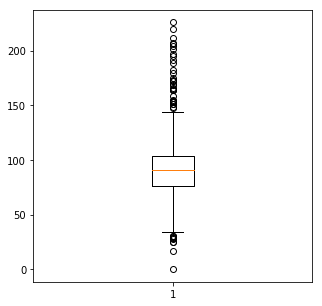

In [106]:
## Overall Distribution of the length of the reviews under each sentiment class
fig,ax = plt.subplots(figsize=(5,5))
plt.boxplot(data.len_of_text)
plt.show()

Text(0.5, 0, 'length of text')

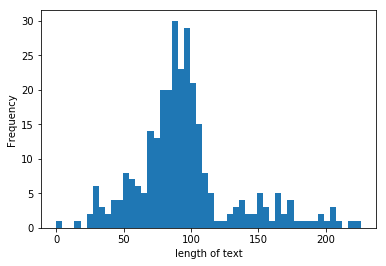

In [107]:
data['len_of_text'].plot(bins=50, kind='hist') 
plt.xlabel('length of text')

In [108]:
data.describe()

,id,likes,retweet_count,followers_count,friends_count,len_of_text,polarity,subjectivity
count,2.950000e+02,295.000000,295.000000,2.950000e+02,295.000000,295.000000,295.000000,295.000000
mean,1.149908e+18,0.708475,58.481356,1.953828e+05,732.525424,95.362712,0.047375,0.231749
std,9.943686e+14,2.009272,312.631837,5.668520e+05,2000.508177,37.721058,0.162192,0.281128
min,1.147438e+18,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-0.500000,0.000000
25%,1.149516e+18,0.000000,0.000000,7.350000e+01,95.000000,76.000000,0.000000,0.000000
50%,1.150453e+18,0.000000,2.000000,5.810000e+02,268.000000,91.000000,0.000000,0.066667
75%,1.150602e+18,0.000000,8.000000,4.961000e+03,616.500000,104.000000,0.077841,0.452273
max,1.150639e+18,17.000000,4824.000000,3.256851e+06,22363.000000,226.000000,0.800000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000157663C8>,
      dtype=object)

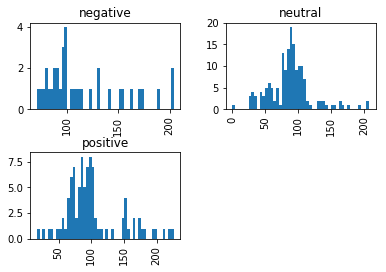

In [110]:
data.hist(column='len_of_text', by='sentiment', bins=50)

In [112]:
#filtering out negative and positive reviews
neg_review = data[data.sentiment == 'negative']
neg_words = []
for t in neg_review.text:
    neg_words.append(t)

In [113]:
neg_words[:5]

['cash culture increase Budget2019 Cafes Shops Restaurants blatantly discourage credit cards.…',
 'rural fetish Throwing money rural India without redistribute excess population worthless populism say Budget2019 TheEconomyIssue2019',
 'MCpodcast Budget2019 market participant look disappointed trigger massive sell-off especially marquee outperformers MarketsWithMC StockMarket',
 'MCopinion Budget2019 mention need impart new-age skill area AI IoT Big Data etc equip youth meet demand Industry 4.0 However fails lay clear roadmap achieve objective via',
 'Modi government may appear plod believe radical transformation achieve help bulldozer writes Budget2019 TheEconomyIssue2019']

In [114]:
neg_text = pd.Series(neg_words).str.cat(sep=' ')
neg_text[:100]

'cash culture increase Budget2019 Cafes Shops Restaurants blatantly discourage credit cards.… rural f'

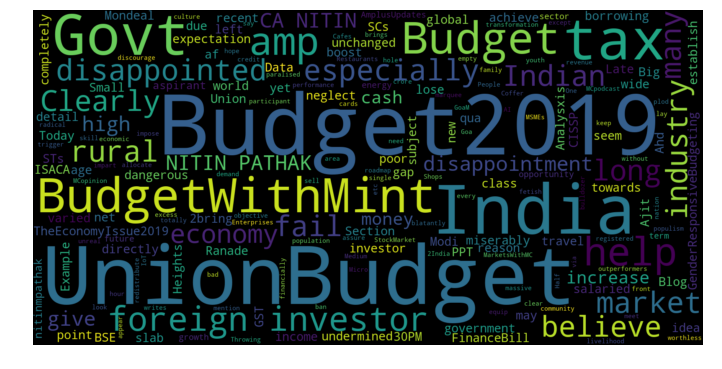

In [115]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [116]:
#filtering out negative and positive reviews
pos_review = data[data.sentiment == 'positive']
pos_words = []
for t in pos_review.text:
    pos_words.append(t)

In [117]:
pos_text = pd.Series(pos_words).str.cat(sep=' ')
pos_text[:100]

'Growth inevitable future accord professional pessimist Budget2019 TheEconomyIssue2019 govt finally a'

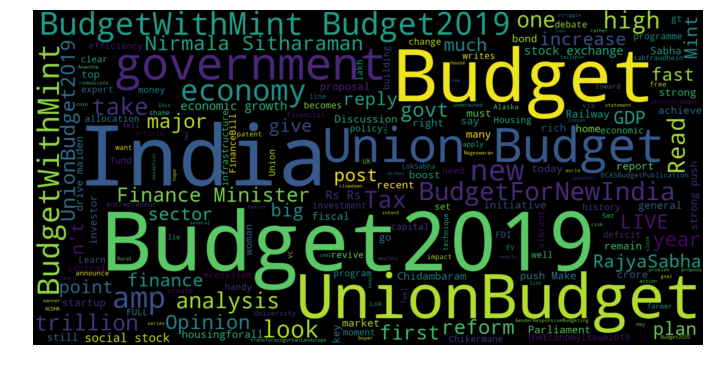

In [118]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 6. SENTIMENT ANALYSIS USING VADER

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains

In [119]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [120]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()

C:\Users\hp\Documents\Fax\anaconda\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [121]:
data['polarity_score']=data['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['negative_score']=data['text'].apply(lambda x: sia.polarity_scores(x)['neg'])
data['positive_score']=data['text'].apply(lambda x: sia.polarity_scores(x)['pos'])
data['neutral_score']=data['text'].apply(lambda x: sia.polarity_scores(x)['neu'])

In [122]:
def sentiment(compound):
    if compound>0:
        return 'positive'
    elif compound<0:
        return 'negative'
    else:
        return 'neutral'  

In [123]:
data['sentiment_vader']=data['polarity_score'].apply(sentiment)

In [124]:
data.sentiment_vader.value_counts()

positive    130
neutral     112
negative     53
Name: sentiment_vader, dtype: int64

In [125]:
data

,id,text,date,likes,retweet_count,place,verified_user,followers_count,friends_count,screen_name,len_of_text,polarity,subjectivity,sentiment,polarity_score,negative_score,positive_score,neutral_score,sentiment_vader
0,1150638623471099904,Growth inevitable future accord professional pessimist Budget2019 TheEconomyIssue2019,2019-07-15 05:30:00,0,0,New Delhi,True,59984,360,Openthemag,85,0.033333,0.408333,positive,0.0258,0.225,0.234,0.541,positive
1,1150638436262350849,Budget2019 symptomatic BJP track-record Tall promise Zero delivery Vision-less Direction-less Provision-les…,2019-07-15 05:29:15,0,64,,False,0,6,Adhittan4,108,0.000000,0.000000,neutral,0.3182,0.000,0.187,0.813,positive
2,1150638420722536449,govt finally accepted unemployment 45 year high Budget2019 must put forth detailed plan fo…,2019-07-15 05:29:11,0,604,,False,0,6,Adhittan4,91,0.186667,0.763333,positive,-0.2023,0.171,0.124,0.706,negative
3,1150637699587379200,'s NLHafta time folk episode join b…,2019-07-15 05:26:20,0,4,,True,61551,440,AbhinandanSekhr,36,0.000000,0.000000,neutral,0.2960,0.000,0.268,0.732,positive
4,1150637326642454529,Steel use development world class institute Budget2019,2019-07-15 05:24:51,0,12,,False,228,180,ClifaA,54,0.000000,0.000000,neutral,0.0000,0.000,0.000,1.000,neutral
5,1150636826316509184,Steel use development Udaan scheme enhance infrastructure airport Budget2…,2019-07-15 05:22:51,0,5,,False,228,180,ClifaA,74,0.000000,0.000000,neutral,0.0000,0.000,0.000,1.000,neutral
6,1150636175197122560,cash culture increase Budget2019 Cafes Shops Restaurants blatantly discourage credit cards.…,2019-07-15 05:20:16,0,16,"Karachi, Pakistan",False,464,190,faisalan,92,-0.500000,0.500000,negative,0.2732,0.178,0.312,0.510,positive
7,1150635048925745152,India emerge strong contender change mindset explore earth produce mi…,2019-07-15 05:15:48,0,46,,False,228,180,ClifaA,70,0.433333,0.733333,positive,0.5859,0.000,0.375,0.625,positive
8,1150634855056715781,2019 2020 budget boost Indian Start-ups favourable startup insight Research Analyst,2019-07-15 05:15:01,0,2,"Surat, India",False,581,14,Ideastycoon,83,0.000000,0.000000,neutral,0.4019,0.000,0.213,0.787,positive
9,1150634355393302528,Easing FDI AVGC sector boost investment propel robust entrepreneurial ecosystem nurture RnD amp creatin…,2019-07-15 05:13:02,0,168,,False,7,14,VidyaUB2904,104,0.000000,0.000000,neutral,0.8176,0.000,0.487,0.513,positive


In [126]:
data.columns

Index(['id', 'text', 'date', 'likes', 'retweet_count', 'place',
       'verified_user', 'followers_count', 'friends_count', 'screen_name',
       'len_of_text', 'polarity', 'subjectivity', 'sentiment',
       'polarity_score', 'negative_score', 'positive_score', 'neutral_score',
       'sentiment_vader'],
      dtype='object')

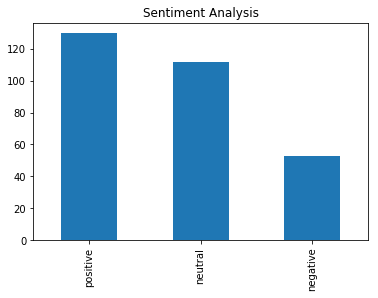

In [127]:
data.sentiment_vader.value_counts().plot(kind='bar',title='Sentiment Analysis')

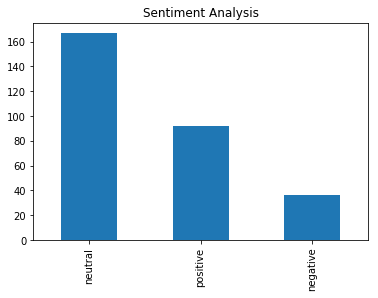

In [128]:
data.sentiment.value_counts().plot(kind='bar',title='Sentiment Analysis')

### 7. FEATURE EXTRACTION AND MODEL BUILDING

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X=data['text']
y=data['sentiment']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [132]:
text_clf_nb=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('classifier',MultinomialNB()),
])

In [133]:
text_clf_nb.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...      vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [134]:
pred_nb=text_clf_nb.predict(X_test)

In [135]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [136]:
print(classification_report(y_test,pred_nb))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        13
     neutral       0.59      1.00      0.74        47
    positive       0.89      0.28      0.42        29

   micro avg       0.62      0.62      0.62        89
   macro avg       0.49      0.43      0.39        89
weighted avg       0.60      0.62      0.53        89



C:\Users\hp\Documents\Fax\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [137]:
print(confusion_matrix(y_test,pred_nb))

[[ 0 12  1]
 [ 0 47  0]
 [ 0 21  8]]


In [138]:
print(accuracy_score(y_test,pred_nb))

0.6179775280898876


In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
text_clf_rf=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('classifier',RandomForestClassifier()),
])

In [141]:
text_clf_rf.fit(X_train,y_train)

C:\Users\hp\Documents\Fax\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [142]:
pred_rf=text_clf_nb.predict(X_test)

In [143]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        13
     neutral       0.59      1.00      0.74        47
    positive       0.89      0.28      0.42        29

   micro avg       0.62      0.62      0.62        89
   macro avg       0.49      0.43      0.39        89
weighted avg       0.60      0.62      0.53        89



C:\Users\hp\Documents\Fax\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [144]:
print(accuracy_score(y_test,pred_nb))

0.6179775280898876


In [145]:
from sklearn.svm import LinearSVC

In [146]:
text_clf_lsvc=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('classifier',LinearSVC()),
])

In [147]:
text_clf_lsvc.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [148]:
pred_lsvc=text_clf_lsvc.predict(X_test)

In [149]:
print(classification_report(y_test,pred_lsvc))

              precision    recall  f1-score   support

    negative       0.75      0.23      0.35        13
     neutral       0.70      0.91      0.80        47
    positive       0.75      0.62      0.68        29

   micro avg       0.72      0.72      0.72        89
   macro avg       0.73      0.59      0.61        89
weighted avg       0.73      0.72      0.69        89



In [150]:
print(accuracy_score(y_test,pred_nb))

0.6179775280898876


In [151]:
get_tweet=api.search(q=['Budget'],count=1,lang="en",tweet_mode='extended')

In [152]:
for tweet in get_tweets1:
    print('Tweet ID',tweet.id)
    print('Tweet text',tweet.full_text)
    print('Tweeted by',tweet.user.screen_name)
    print('\n')

Tweet ID 1150638623471099904
Tweet text Growth is inevitable: @devangshudatta on the future according to a professional pessimist, #Budget2019, #TheEconomyIssue2019, https://t.co/mdsBQiyoIE https://t.co/BCuYXameDC
Tweeted by Openthemag


Tweet ID 1150638436262350849
Tweet text RT @SanjaySDutt: #Budget2019 is symptomatic of BJP track-record :
Tall promises : Zero delivery!
Vision-less, Direction-less, Provision-les…
Tweeted by Adhittan4


Tweet ID 1150638420722536449
Tweet text RT @INCIndia: Now that the govt. has finally accepted that unemployment is at a 45 year high, #Budget2019 must put forth a detailed plan fo…
Tweeted by Adhittan4


Tweet ID 1150637699587379200
Tweet text RT @newslaundry: It's #NLHafta time, folks!

In this episode, @AbhinandanSekhr, @madhutrehan, @anandvardhan26 and @ramankirpal are joined b…
Tweeted by AbhinandanSekhr


Tweet ID 1150637326642454529
Tweet text RT @SteelMinIndia: Steel will be used for the development of the world class institutes. #Budget2019 htt

In [153]:
print(text_clf_lsvc.predict(['Another centre of attention in the #Budget2019 is the aspiring young Indian. ']))

['neutral']


In [154]:
text='The auto index saw the biggest intraday decline since Feb after an extremely negative #Budget2019 for the ailing sector. For the first time in recent years, Brokerages recommend initiating shorts in bellwether #Maruti as the fresh breakdown is likely to trigger further weakness.'

In [157]:
print(text_clf_nb.predict([text]))

['neutral']


In [158]:
data.shape

(295, 19)